In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 6.8 MB/s 


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mne
import numpy
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
file = "drive//MyDrive//RAW//edf_export//data.edf"
data = mne.io.read_raw_edf(file)

info = data.info
channels = data.ch_names
size = os.path.getsize(file)
info
#print('Size of file is', size, 'bytes')

Extracting EDF parameters from /content/drive/MyDrive/RAW/edf_export/data.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Info | 7 non-empty values
 bads: []
 ch_names: ch1_LF5-FpZ, ch2_OTE_L-FpZ, ch3_BE_L-FpZ, ch4_RF6-FpZ, ...
 chs: 6 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: 2022-04-09 00:18:26 UTC
 nchan: 6
 projs: []
 sfreq: 125.0 Hz
>

In [ ]:
channels

['ch1_LF5-FpZ',
 'ch2_OTE_L-FpZ',
 'ch3_BE_L-FpZ',
 'ch4_RF6-FpZ',
 'ch5_OTE_R-FpZ',
 'ch6_BE_R-FpZ']

In [ ]:
from scipy.fft import fft, dct
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
EEG_raw_data = data.get_data()

**VISUALIZATION OF CHANNEL 1 DATA**

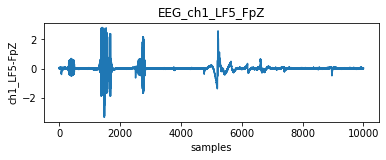

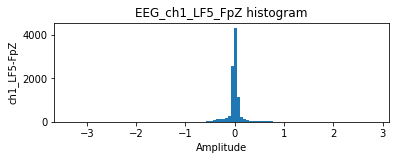

In [ ]:
SCALE=1e3
raw_data= EEG_raw_data*SCALE
MAX_LENGTH=10000
DATA_OFFSET=2000;     # data offset
N_HIST_BIN=100
#EEG channel 1
channel_id=0
plt.subplot(2,1,1)
plt.plot(raw_data[channel_id,1:MAX_LENGTH])
plt.ylabel(channels[channel_id])
plt.xlabel("samples")
plt.title("EEG_ch1_LF5_FpZ");
plt.show()

plt.subplot(2,1,2)
plt.hist(raw_data[channel_id,1:MAX_LENGTH], N_HIST_BIN)
plt.ylabel(channels[channel_id])
plt.xlabel("Amplitude")
plt.title("EEG_ch1_LF5_FpZ histogram");
plt.show()

**VISUALIZATION OF CHANNEL 2 DATA**

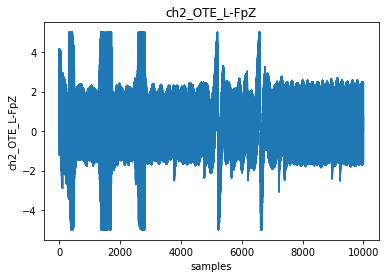

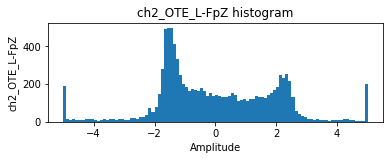

In [ ]:
channel_id = 1
#plt.subplot(2,1,1)
plt.plot(raw_data[channel_id,1:MAX_LENGTH])
plt.ylabel(channels[channel_id])
plt.xlabel("samples")
plt.title("ch2_OTE_L-FpZ");
plt.show()

plt.subplot(2,1,2)
plt.hist(raw_data[channel_id,1:MAX_LENGTH], N_HIST_BIN)
plt.ylabel(channels[channel_id])
plt.xlabel("Amplitude")
plt.title("ch2_OTE_L-FpZ histogram");
plt.show()

**VISUALIZATION OF CHANNEL 3 DATA**

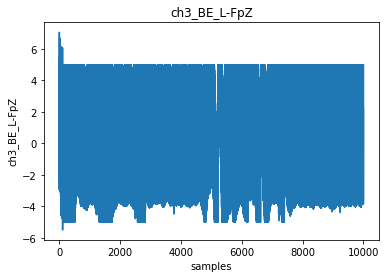

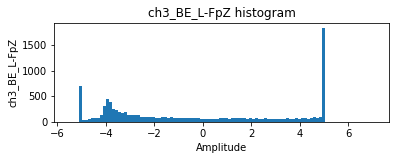

In [ ]:
channel_id = 2

plt.plot(raw_data[channel_id,1:MAX_LENGTH])
plt.ylabel(channels[channel_id])
plt.xlabel("samples")
plt.title("ch3_BE_L-FpZ");
plt.show()

plt.subplot(2,1,2)
plt.hist(raw_data[channel_id,1:MAX_LENGTH], N_HIST_BIN)
plt.ylabel(channels[channel_id])
plt.xlabel("Amplitude")
plt.title("ch3_BE_L-FpZ histogram");
plt.show()

**VISUALIZATION OF CHANNEL 4 DATA**

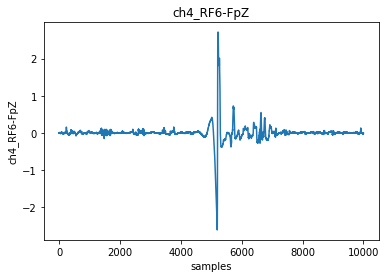

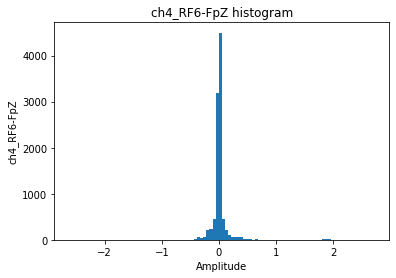

In [ ]:
channel_id = 3

plt.plot(raw_data[channel_id,1:MAX_LENGTH])
plt.ylabel(channels[channel_id])
plt.xlabel("samples")
plt.title("ch4_RF6-FpZ");
plt.show()

#plt.subplot(2,1,2)
plt.hist(raw_data[channel_id,1:MAX_LENGTH], N_HIST_BIN)
plt.ylabel(channels[channel_id])
plt.xlabel("Amplitude")
plt.title("ch4_RF6-FpZ histogram");
plt.show()

**VISUALIZATION OF CHANNEL 5 DATA**

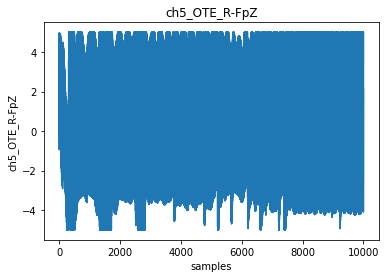

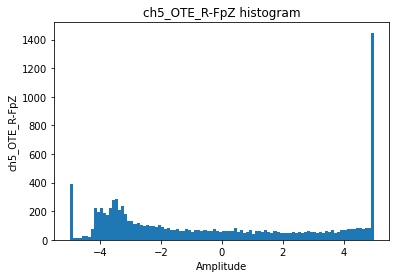

In [ ]:
channel_id = 4

plt.plot(raw_data[channel_id,1:MAX_LENGTH])
plt.ylabel(channels[channel_id])
plt.xlabel("samples")
plt.title("ch5_OTE_R-FpZ");
plt.show()

#plt.subplot(2,1,2)
plt.hist(raw_data[channel_id,1:MAX_LENGTH], N_HIST_BIN)
plt.ylabel(channels[channel_id])
plt.xlabel("Amplitude")
plt.title("ch5_OTE_R-FpZ histogram");
plt.show()

**VISUALIZATION OF CHANNEL 6 DATA**

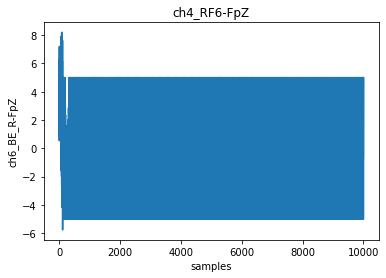

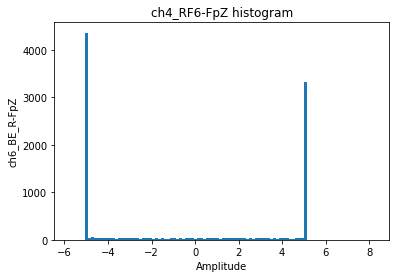

In [ ]:
channel_id = 5

plt.plot(raw_data[channel_id,1:MAX_LENGTH])
plt.ylabel(channels[channel_id])
plt.xlabel("samples")
plt.title("ch4_RF6-FpZ");
plt.show()

#plt.subplot(2,1,2)
plt.hist(raw_data[channel_id,1:MAX_LENGTH], N_HIST_BIN)
plt.ylabel(channels[channel_id])
plt.xlabel("Amplitude")
plt.title("ch4_RF6-FpZ histogram");
plt.show()

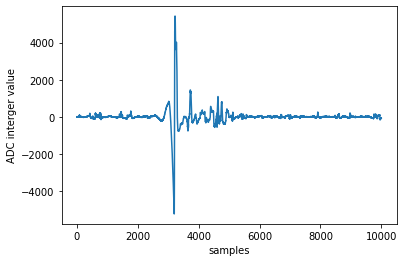

80096


In [ ]:
channel_id = 3
EEG_MAX=0.01;         #  asummed max value of EEG signal
EEG_MAX_INT=2^23-1    # using 24 bit ADC, the max value of EEG is corresponding to 2^23-1

x=np.round(raw_data[channel_id,DATA_OFFSET:DATA_OFFSET-1+MAX_LENGTH]/EEG_MAX*(2^23-1))
plt.plot(x)
plt.ylabel("ADC interger value")

plt.xlabel("samples")
plt.show()
import sys
print(sys.getsizeof(x))

**Golomb Code**

Differential signal compression

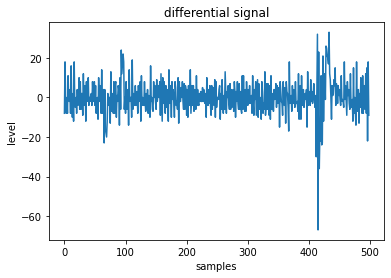

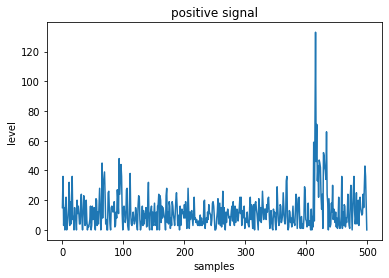

0.0000001111|0.0000100100|0.0000000011|0.0000001111|0.0000000000|0.0000001111|0.0000010110|0.0000000000|0.0000000011|0.0000001000|0.0000001111|0.0000100000|0.0000000011|0.0000010011|0.0000000100|0.0000010111|0.0000100100|0.0000000111|0.0000001001|0.0000000000|0.0000001111|0.0000001000|0.0000000111|0.0000000000|0.0000010100|0.0000001011|0.0000010000|0.0000001011|0.0000000100|0.0000000100|0.0000010001|0.0000011000|0.0000000111|0.0000000000|0.0000001100|0.0000010111|0.0000010000|0.0000000011|0.0000000100|0.0000010100|0.0000000111|0.0000000000|0.0000000011|0.0000000010|0.0000000100|0.0000000111|0.0000010000|0.0000000000|0.0000000011|0.0000010000|0.0000000111|0.0000001100|0.0000001111|0.0000000011|0.0000000000|0.0000010101|0.0000010100|0.0000000011|0.0000001100|0.0000000100|0.0000001111|0.0000011100|0.0000001111|0.0000000000|0.0000001000|0.0000101101|0.0000001000|0.0000011111|0.0000100011|0.0000100111|0.0000010111|0.0000000100|0.0000000111|0.0000000000|0.0000000000|0.0000011001|0.0000011010

In [ ]:
import math

# Golomb Code
# channel 2 and 5 are not used
# start compression
#Preparation


N= 500    # 1000;
b=10   # golomb parameter
M=math.pow(2,b)   #1024= 2^10      # Golomb parameter
codeStream=""
codeStream_debug=""
#Step 1: calculate the differential
y=x[0:N-1]-x[1:N]
z=[0]*N
r=[0]*N
q=[0]*N
# Step 2: Convert to all positive values
for k in range (N-1):
    if y[k]>=0 :
        z[k]=2*y[k]
    else :
        z[k]=-2*y[k]-1
    # Step 3: Golomb code

    #def golomb(codeword,m):
    c = int(math.ceil(math.log(M,2)))  # for the formulas refer wikipedia page link in the readme file
    #calculate quotient, remainder
    r[k] = int(z[k]%M)
    q[k] = int(math.floor(z[k]/M))

    div = int(math.pow(2,c)-M)

    #Step 4.1: quotient is put in unary code
    quotientBit = ""
    remainderBit=""
    a=""
    for i in range(q[k]):
        quotientBit = quotientBit + "1"
    quotientBit = quotientBit + "0"
    #     print("First:",first)
    #Step 4.2: remainder is in binary mode
    if r[k] < div:
        b = c-1
        a = "{0:0" + str(b) + "b}"
        #print("1",a.format(r[k]))
        remainderBit = a.format(r[k])
    else:
        b = c
        a = "{0:0" + str(b) + "b}"
        #print("2",a.format(r[k] + div))
        remainderBit = a.format(r[k] + div)

    codeStream_debug = codeStream_debug + quotientBit + "."+ remainderBit +"|"
    codeStream = codeStream + quotientBit + remainderBit


end = time.time()


plt.plot(y)
plt.ylabel("level")
plt.xlabel("samples")
plt.title("differential signal");
plt.show()

plt.plot(z)
plt.ylabel("level")
plt.xlabel("samples")
plt.title("positive signal");
plt.show()



# print("Golomb code parameter:",M)
# print("Number of samples:",N, " and number of bits:", N*24);
# print("Length of compressed data", len(codeStream)+24)
# print("Code rate:",(len(codeStream)+24)/(N*24))
# print(f"the time consumption {end-start}")

# if ((len(codeStream)+24)/(N*24) > 1):
#   print("compression ratio is not good")
#print(x)
print(codeStream_debug)
print(codeStream)

# **Differential signal decompression**

In [ ]:
Q_read = 1
R_read = 0

q_part = ""
r_part = ""

q_val = []
r_val = []


counter = 10 #this is the golomb remainder parametere which is the lenght of the remainder

for i in codeStream:
  if (Q_read == 1 and i == '1'):
    q_part = q_part + '1'
  if (Q_read == 1 and i == '0'):
    q_val.append(q_part)
    q_part = ""
    # q_part = q_part + '0'
    # q_val.append(q_part)
    R_read = 1
    Q_read = 0
    continue
  if (R_read and counter >0):
    r_part = r_part + i
    counter = counter -1
    if (counter ==0):
      r_val.append(r_part)
      r_part = ""
      R_read = 0
      Q_read = 1
      counter = 10 ## again ssetting it to the proper value (remainder this values setting must be done properly otherwise results would be fatal)

In [ ]:
print(codeStream_debug)
print(q_val)
print(r_val)

11111110.1011101101|110.0000001110|111110.1111001010|111111111111110.1011111001|111111111111110.1001000010|11111110.1111011001|110.0110011000|111110.1100000000|111111111111110.1010111111|111111111111110.1001000010|111111110.0010100011|110.1010111010|111110.1001000110|111111111111110.1001000101|111111111111110.1001000100|111111110.0101101001|1110.0001000010|111110.0110000000|111111111111110.0111001101|111111111111110.1000110000|111111110.1001101101|1110.0110011100|111110.0010100110|111111111111110.0101010011|111111111111110.1000000110|111111110.1100110011|1110.1011010000|11110.1111101000|111111111111110.0100100011|111111111111110.0111110110|1111111110.0000010011|11110.0001000110|11110.1100001100|111111111111110.0010110011|111111111111110.0110101100|1111111110.0011100011|11110.0101111000|11110.1000100010|111111111111110.0000100101|111111111111110.0101101010|1111111110.0111010101|11110.1010100010|11110.0101001100|11111111111110.1110000001|111111111111110.0100100110|1111111110.1001111101|1

**Recognising NULL values as 0s**

In [ ]:
for i in range(len(q_val)):
  if (q_val[i] == ''):
    q_val[i] = '0'

print(q_val)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

**Q values in Decimals**

In [ ]:
from re import template
Q_vals_Decimals = []
for i in q_val:
  if (i == '0'):
    Q_vals_Decimals.append(0)
  else:
    Q_vals_Decimals.append(len(i))

print(Q_vals_Decimals)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

**Conversion of r[k] from bits to decimals**

In [ ]:
r_val_Decimal = []
for i in r_val:
  r_val_Decimal.append(int(i,2))

print(r_val_Decimal)

[15, 36, 3, 15, 0, 15, 22, 0, 3, 8, 15, 32, 3, 19, 4, 23, 36, 7, 9, 0, 15, 8, 7, 0, 20, 11, 16, 11, 4, 4, 17, 24, 7, 0, 12, 23, 16, 3, 4, 20, 7, 0, 3, 2, 4, 7, 16, 0, 3, 16, 7, 12, 15, 3, 0, 21, 20, 3, 12, 4, 15, 28, 15, 0, 8, 45, 8, 31, 35, 39, 23, 4, 7, 0, 0, 25, 26, 13, 4, 0, 15, 16, 15, 12, 16, 19, 2, 3, 12, 8, 27, 20, 11, 48, 24, 34, 44, 36, 11, 0, 15, 16, 11, 5, 8, 27, 28, 3, 0, 0, 19, 38, 11, 4, 3, 7, 12, 7, 4, 6, 15, 12, 3, 0, 16, 23, 22, 7, 0, 3, 7, 16, 3, 13, 4, 11, 8, 15, 2, 3, 19, 32, 3, 0, 11, 13, 16, 0, 12, 3, 11, 18, 3, 4, 12, 0, 16, 17, 24, 0, 23, 20, 5, 16, 8, 15, 12, 9, 8, 0, 23, 28, 5, 12, 4, 19, 16, 1, 8, 3, 19, 16, 10, 7, 3, 11, 20, 25, 16, 3, 3, 10, 0, 16, 3, 11, 14, 11, 12, 8, 17, 8, 19, 12, 1, 7, 28, 15, 1, 12, 7, 12, 13, 8, 3, 11, 22, 7, 8, 5, 7, 4, 3, 6, 3, 3, 10, 3, 8, 3, 5, 4, 19, 20, 1, 7, 8, 5, 12, 7, 17, 12, 11, 10, 3, 7, 18, 19, 16, 9, 0, 0, 1, 8, 12, 21, 4, 11, 18, 3, 15, 2, 11, 26, 4, 15, 6, 0, 12, 5, 11, 14, 11, 8, 9, 3, 8, 13, 16, 6, 19, 6, 3, 16, 5,

In [ ]:
decompressed_data = []
for i in range(499):
  decompressed_data.append(M * Q_vals_Decimals[i] + r_val_Decimal[i])

print(z)
print(decompressed_data)

[15.0, 36.0, 3.0, 15.0, 0.0, 15.0, 22.0, 0.0, 3.0, 8.0, 15.0, 32.0, 3.0, 19.0, 4.0, 23.0, 36.0, 7.0, 9.0, 0.0, 15.0, 8.0, 7.0, 0.0, 20.0, 11.0, 16.0, 11.0, 4.0, 4.0, 17.0, 24.0, 7.0, 0.0, 12.0, 23.0, 16.0, 3.0, 4.0, 20.0, 7.0, 0.0, 3.0, 2.0, 4.0, 7.0, 16.0, 0.0, 3.0, 16.0, 7.0, 12.0, 15.0, 3.0, 0.0, 21.0, 20.0, 3.0, 12.0, 4.0, 15.0, 28.0, 15.0, 0.0, 8.0, 45.0, 8.0, 31.0, 35.0, 39.0, 23.0, 4.0, 7.0, 0.0, 0.0, 25.0, 26.0, 13.0, 4.0, 0.0, 15.0, 16.0, 15.0, 12.0, 16.0, 19.0, 2.0, 3.0, 12.0, 8.0, 27.0, 20.0, 11.0, 48.0, 24.0, 34.0, 44.0, 36.0, 11.0, 0.0, 15.0, 16.0, 11.0, 5.0, 8.0, 27.0, 28.0, 3.0, 0.0, 0.0, 19.0, 38.0, 11.0, 4.0, 3.0, 7.0, 12.0, 7.0, 4.0, 6.0, 15.0, 12.0, 3.0, 0.0, 16.0, 23.0, 22.0, 7.0, 0.0, 3.0, 7.0, 16.0, 3.0, 13.0, 4.0, 11.0, 8.0, 15.0, 2.0, 3.0, 19.0, 32.0, 3.0, 0.0, 11.0, 13.0, 16.0, 0.0, 12.0, 3.0, 11.0, 18.0, 3.0, 4.0, 12.0, 0.0, 16.0, 17.0, 24.0, 0.0, 23.0, 20.0, 5.0, 16.0, 8.0, 15.0, 12.0, 9.0, 8.0, 0.0, 23.0, 28.0, 5.0, 12.0, 4.0, 19.0, 16.0, 1.0, 8.0, 3.0, 19.0

In [ ]:
for i in range(len(decompressed_data)):
  if (z[i] != decompressed_data[i]):
    print("error")


# **RAW Signal compression**

In [ ]:
# Golomb Code
# channel 2 and 5 are not used
# start compression
#Preparation
start = time.time()
N= 1000    # 1000;
b=12
M=math.pow(2,b)         # Golomb parameter
codeStream=""
codeStream_debug=""
for k in range (N-1):

  c = int(math.ceil(math.log(M,2)))  # for the formulas refer wikipedia page link in the readme file
    #calculate quotient, remainder
  r[k] = int(x[k]%M)
  q[k] = int(math.floor(x[k]/M))

  div = int(math.pow(2,c)-M)

    #Step 4.1: quotient is put in unary code
  quotientBit = ""
  remainderBit=""
  a=""
  for i in range(q[k]):
       quotientBit = quotientBit + "1"
  quotientBit = quotientBit + "0"
    #     print("First:",first)
    #Step 4.2: remainder is in binary mode
  if r[k] < div:
       b = c-1
       a = "{0:0" + str(b) + "b}"
        #print("1",a.format(r[k]))
       remainderBit = a.format(r[k])
  else:
      b = c
      a = "{0:0" + str(b) + "b}"
        #print("2",a.format(r[k] + div))
      remainderBit = a.format(r[k] + div)

  codeStream_debug = codeStream_debug + quotientBit + "."+ remainderBit +"|"
  codeStream = codeStream + quotientBit + remainderBit

end = time.time()

print("Golomb code parameter:",M)
print("Number of samples:",N, " and number of bits:", N*24);
print("Length of compressed data", len(codeStream)+24)
print("Code rate:",(len(codeStream)+32)/(N*32))
print(f"the time consumption {end-start}")

if ((len(codeStream)+24)/(N*24) > 1):
  print("compression ratio is not good")
else:
  print("compression ratio is ok")


Golomb code parameter: 4096.0
Number of samples: 1000  and number of bits: 24000
Length of compressed data 13262
Code rate: 0.4146875
the time consumption 0.010527372360229492
compression ratio is ok


# **RAW Signal decompression**

In [ ]:
Q_read = 1
R_read = 0

q_part = ""
r_part = ""

q_val = []
r_val = []


counter = 10 #this is the golomb remainder parametere which is the lenght of the remainder

for i in codeStream:
  if (Q_read == 1 and i == '1'):
    q_part = q_part + '1'
  if (Q_read == 1 and i == '0'):
    q_val.append(q_part)
    q_part = ""
    # q_part = q_part + '0'
    # q_val.append(q_part)
    R_read = 1
    Q_read = 0
    continue
  if (R_read and counter >0):
    r_part = r_part + i
    counter = counter -1
    if (counter ==0):
      r_val.append(r_part)
      r_part = ""
      R_read = 0
      Q_read = 1
      counter = 10 ## again ssetting it to the proper value (remainder this values setting must be done properly otherwise results would be fatal)

In [ ]:
print(codeStream_debug)
print(q_val)
print(r_val)

0.010110001100|0.010100000011|0.000011111100|0.010100010111|10.001010010100|0.010101110011|0.010101100000|0.000010010100|0.010100010100|10.001001110100|0.010101010011|0.010110100101|0.000001001000|0.010100100101|10.001001001000|0.010100100110|0.010111011011|0.111110111010|0.010011111010|10.000111100001|0.010011001001|0.011000000000|0.111100110010|0.010011011111|10.000110001001|0.010010000110|0.011000100000|0.111010111000|0.010011000100|10.000101010110|0.010001011011|0.011001100101|0.111001000010|0.010010111100|10.000100010110|0.010001000000|0.011010110010|0.110111110110|0.010011100101|10.000011111000|0.010001000011|0.011100101110|0.110111011101|0.010100110111|10.000011111000|0.010001100101|0.011110100100|0.110110010101|0.010101101011|10.000011111100|0.010001111011|0.100000111100|0.110110001010|0.010111000010|10.000100001110|0.010010010000|0.100011000000|0.110101100010|0.010111111010|10.000011111001|0.010010110101|0.100100111011|0.110100111001|0.011000110111|10.000011100000|0.0100101110

In [ ]:
for i in range(len(q_val)):
  if (q_val[i] == ''):
    q_val[i] = '0'

print(q_val)

['0', '0', '0', '1111', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '11', '0', '11', '0', '11', '11', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '11111', '0', '0', '111', '0', '0', '0', '0', '0', '0', '0', '0', '0', '11', '0', '1', '0', '0', '0', '1', '0', '1', '0', '111', '1', '111', '11', '1', '11', '0', '111', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '11111', '0', '11', '11', '0', '11', '1', '0', '111', '0', '1111', '0', '0', '1', '0', '1111', '0', '1', '11111', '0', '11', '0', '111', '0', '1', '11', '0', '1111', '0', '1', '1', '0', '0', '0', '11111', '0', '1', '111', '1', '111111', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '111', '0', '1', '1', '1', '1111', '0', '1', '0', '11', '0', '0', '1', '0', '0', '0', '11', '0', '1', '0', '11', '11', '0', '11', '11', '111', '0', '1111', '11', '0', '11', '11', '0', '1', '0', '0', '1', '0', '11', '0', '11', '11', '1', '0', '0'

In [ ]:
from re import template
Q_vals_Decimals = []
for i in q_val:
  if (i == '0'):
    Q_vals_Decimals.append(0)
  else:
    Q_vals_Decimals.append(len(i))

print(Q_vals_Decimals)

[0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 5, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 3, 1, 3, 2, 1, 2, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 5, 0, 2, 2, 0, 2, 1, 0, 3, 0, 4, 0, 0, 1, 0, 4, 0, 1, 5, 0, 2, 0, 3, 0, 1, 2, 0, 4, 0, 1, 1, 0, 0, 0, 5, 0, 1, 3, 1, 6, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 3, 0, 1, 1, 1, 4, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 3, 0, 4, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 3, 4, 0, 3, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 2, 0, 1, 0, 0, 1, 0, 4, 5, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 4, 0, 0, 2, 0, 4, 1, 0, 2, 1, 0, 3, 0, 2, 0, 0, 0, 0, 3, 4, 4, 0, 3, 1, 0, 3, 0, 0, 1, 0, 1, 0, 0, 1, 5, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 5, 0, 0, 1, 0, 0, 2, 0, 0, 3, 5, 3, 0, 1, 0, 1, 0, 0, 

In [ ]:
r_val_Decimal = []
for i in r_val:
  r_val_Decimal.append(int(i,2))

print(r_val_Decimal)

[355, 80, 387, 81, 965, 322, 921, 704, 74, 162, 275, 533, 613, 592, 288, 587, 146, 82, 791, 879, 930, 1002, 240, 306, 608, 60, 275, 1008, 146, 536, 129, 736, 393, 85, 139, 819, 348, 68, 968, 556, 544, 214, 623, 787, 352, 34, 206, 742, 933, 444, 248, 281, 634, 566, 677, 860, 252, 286, 527, 216, 558, 161, 113, 288, 192, 856, 191, 643, 293, 676, 873, 305, 961, 9, 932, 269, 193, 522, 122, 312, 676, 360, 77, 272, 896, 484, 717, 826, 625, 54, 82, 693, 204, 797, 65, 421, 250, 966, 608, 648, 312, 659, 777, 708, 496, 258, 275, 398, 95, 319, 351, 403, 940, 741, 836, 17, 786, 885, 522, 891, 524, 758, 786, 424, 600, 800, 887, 401, 858, 344, 66, 570, 68, 787, 790, 599, 535, 736, 800, 730, 39, 336, 1005, 257, 283, 804, 898, 188, 476, 461, 439, 143, 289, 524, 760, 579, 874, 112, 527, 746, 188, 217, 637, 130, 354, 788, 437, 238, 577, 596, 19, 795, 711, 450, 234, 572, 163, 903, 625, 652, 671, 788, 925, 371, 386, 708, 494, 179, 958, 457, 624, 310, 279, 798, 654, 1013, 341, 417, 201, 509, 57, 427, 425, 8

In [ ]:
decompressed_data = []
for i in range(999):
  decompressed_data.append(M * Q_vals_Decimals[i] + r_val_Decimal[i])

print(z)
print(decompressed_data)

[7917.0, 2062.0, 6090.0, 15097.0, 14914.0, 8153.0, 2456.0, 5888.0, 15039.0, 14914.0, 8355.0, 2746.0, 5702.0, 14917.0, 14916.0, 8553.0, 3138.0, 5504.0, 14797.0, 14896.0, 8813.0, 3484.0, 5286.0, 14675.0, 14854.0, 9011.0, 3792.0, 5096.0, 14627.0, 14838.0, 9235.0, 4166.0, 4876.0, 14515.0, 14764.0, 9443.0, 4472.0, 4642.0, 14373.0, 14698.0, 9685.0, 4770.0, 4428.0, 14209.0, 14630.0, 9853.0, 5150.0, 4180.0, 14113.0, 14594.0, 10113.0, 5476.0, 3984.0, 13975.0, 14588.0, 10335.0, 5820.0, 3792.0, 13821.0, 14472.0, 10507.0, 6148.0, 3588.0, 13649.0, 14412.0, 10779.0, 6496.0, 3372.0, 13541.0, 14376.0, 10959.0, 6800.0, 3186.0, 13359.0, 14300.0, 11189.0, 7112.0, 2964.0, 13169.0, 14166.0, 11357.0, 7468.0, 2732.0, 12985.0, 14172.0, 11577.0, 7752.0, 2528.0, 12775.0, 14058.0, 11771.0, 8108.0, 2334.0, 12579.0, 13992.0, 12003.0, 8430.0, 2088.0, 12315.0, 13868.0, 12193.0, 8692.0, 1888.0, 12121.0, 13736.0, 12367.0, 8980.0, 1684.0, 11881.0, 13648.0, 12551.0, 9304.0, 1462.0, 11631.0, 13544.0, 12757.0, 9556.0, 124

In [ ]:
for i in range(len(decompressed_data)):
  if (z[i] != decompressed_data[i]):
    print("error")